In [62]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/usr/PP'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
#import WordCloud
from matplotlib import colors

In [64]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

import ast

In [3]:
#df = pd.read_csv("/usr/PP/jobs2.csv",sep='\t',encoding='utf-8')
df = pd.read_csv("jobs.csv", encoding="utf-16").drop(['ID'], axis=1).drop_duplicates()
print(df.shape)
df.sample(5)
np.min(df['Mean_Salary'])

(98574, 14)


9200.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98574 entries, 0 to 107000
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job               98574 non-null  object 
 1   Jobs_Group        98574 non-null  object 
 2   Profile           35954 non-null  object 
 3   Remote            38668 non-null  object 
 4   Company           98527 non-null  object 
 5   Location          98574 non-null  object 
 6   City              87505 non-null  object 
 7   State             89922 non-null  object 
 8   Salary            42101 non-null  object 
 9   Frecuency_Salary  42101 non-null  object 
 10  Low_Salary        42101 non-null  float64
 11  High_Salary       42101 non-null  float64
 12  Mean_Salary       42101 non-null  float64
 13  Skills            98574 non-null  object 
dtypes: float64(3), object(11)
memory usage: 11.3+ MB


In [5]:
np.max(df['Mean_Salary'])

600000.0

In [66]:
df.isnull().sum()

Job                     0
Jobs_Group              0
Profile             62620
Remote              59906
Company                47
Location                0
City                11069
State                8652
Salary              56473
Frecuency_Salary    56473
Low_Salary          56473
High_Salary         56473
Mean_Salary         56473
Skills                  0
dtype: int64

In [4]:
df=df.dropna(subset=['Low_Salary','High_Salary','Mean_Salary'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 42101 entries, 0 to 106995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job               42101 non-null  object 
 1   Jobs_Group        42101 non-null  object 
 2   Profile           15347 non-null  object 
 3   Remote            17934 non-null  object 
 4   Company           42091 non-null  object 
 5   Location          42101 non-null  object 
 6   City              37103 non-null  object 
 7   State             38023 non-null  object 
 8   Salary            42101 non-null  object 
 9   Frecuency_Salary  42101 non-null  object 
 10  Low_Salary        42101 non-null  float64
 11  High_Salary       42101 non-null  float64
 12  Mean_Salary       42101 non-null  float64
 13  Skills            42101 non-null  object 
dtypes: float64(3), object(11)
memory usage: 4.8+ MB


In [5]:
main_label = 'Mean_Salary'
df[main_label] = df[main_label]*1e-3
df = df[df[main_label]>0]
# concat city and state
df['City'] = (df['City'] + ', ' + df['State'])
# fill nan values
df['Profile'] = df['Profile'].fillna('None')
df['City'] = df['City'].fillna('Remote')
df['Remote'] = df['Remote'].fillna('On-Site')

In [69]:
'''for i in df['Frecuency_Salary']:
  if i == 'año':
    df['Frecuency_Salary'].replace(i,'annum')'''

df['Frecuency_Salary'].replace(['año','hora','mes', 'día', 'semana'],['annum','hour','month','day','week'])

0         annum
6         annum
8          hour
9         annum
12        annum
          ...  
106987     hour
106988    annum
106993    annum
106994    annum
106995    annum
Name: Frecuency_Salary, Length: 42101, dtype: object

In [36]:
l1=list()
for i in range (0,len(list(df['Skills']))):
  #list(df['Skills'])[i].replace('\'','')
  l1.append((list(df['Skills'])[i][2:-2].replace('\'','').split(',')))


In [14]:
list(df['Skills'])[1][2:-2].replace('\'','').split(',')

['Access', ' Office', ' SQL', ' Bachelor', ' .NET', ' ERP']

In [12]:
l2=list()
for i in range(len(l1)):
  for j in range(len(l1[i])):
    l2.append(l1[i][j])

In [71]:
df['Jobs_Group'].nunique()

14

In [19]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
words1=list()
for i in l2:
  words1.append(i.lstrip())
print(words1)
# Count occurrences of each word
word_counts = Counter(words1)
color_blind_palette = ["#DC267F", "#785EF0", "#648FFF", "#FE6100", "#FFB000", "#E80E8D", "#2E8766",
                       "#95ABAC", "#65B925", "#906A42", "#C4D537", "#344A52", "#6C6E06", "#1C4DD2", "#216E00",
                       "#2E03E5", "#A94424", "#7F6EA9", "#9B8453", "#380721"]
# Extract words and their counts
words = list(word_counts.keys())
print(len(words))
counts = list(word_counts.values())
indexes = np.arange(len(words))
# Plot the bar graph
plt.figure(figsize=(27,6))
ms_skills = sns.barplot(x=words,
                                      y=np.log2(counts), palette=color_blind_palette)

plt.rcParams['font.size'] = '9'

width = 0.7
#plt.plot(words, np.log2(counts))
#plt.xticks(indexes + width * 0.5, words)
plt.tick_params(axis="x", rotation=90)
plt.xlabel('Words',fontsize=0.02)
plt.ylabel('Occurrences',fontsize=10)
plt.title('Word Occurrences in the List')
for patch in ms_skills.patches:
             ms_skills.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                 ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()
#plt.show()


NameError: name 'l2' is not defined

In [30]:
from collections import Counter
import seaborn as sns

In [14]:
dfp = df['Jobs_Group'].value_counts().head(20).sort_values(ascending = True).reset_index()
dfl = df['City'].value_counts().head(20).sort_values(ascending = True).reset_index()
dfc = df['Company'].value_counts().head(20).sort_values(ascending = True).reset_index()

import plotly.graph_objs as go
fig = go.Figure()

fig.add_trace(go.Bar(x = dfp['count'],
                     y = dfp['Jobs_Group'],
                     orientation='h',
                     name = 'Position',
                     marker = dict(color = 'Green')))

fig.add_trace(go.Bar(x = dfl['count'],
                     y = dfl['City'],
                     orientation='h',
                     name = 'Location',
                     marker = dict(color = 'SeaGreen')))

fig.add_trace(go.Bar(x = dfc['count'],
                     y = dfc['Company'],
                     orientation='h',
                     name = 'Company',
                     marker = dict(color = 'darkgreen')))

fig.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            direction="left",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.16,
            xanchor="left",
            y=1.12,
            yanchor="top",
            font = dict(color = 'Indigo',size = 12),
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[ {"visible": [True, True, True]},
                            {'showlegend' : True} , {"font":10}
                        ]),
                dict(label="Position",
                     method="update",
                     args=[ {"visible": [True, False, False]},
                            {'showlegend' : True}
                        ]),
                dict(label='Location',
                     method="update",
                     args=[ {"visible": [False, True, False]},
                            {'showlegend' : True}
                     ]),
                dict(label='Company',
                     method="update",
                     args=[ {"visible": [False, False, True]},
                            {'showlegend' : True}]),
            ]),
        )])
fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=12,color = 'Black'))])

fig.update_layout(title ="Top 10 Positions, Locations and Companies",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))


fig.show()

In [15]:
dfd1 = df[df['Profile']== 'Junior']
dfd2 = df[df['Profile']== 'Senior']
dfd3 = df[df['Profile']== 'Lead']
#dfd4 = df[df['position']== 'Data Engineer']

redf1 = dfd1["Jobs_Group"].value_counts()[:15].reset_index()
redf2 = dfd2["Jobs_Group"].value_counts()[:15].reset_index()
redf3 = dfd3["Jobs_Group"].value_counts()[:15].reset_index()
#redf4 = dfd4['state'].value_counts()[:10].reset_index()


fig = go.Figure()

fig.add_trace(go.Bar(x = redf1["Jobs_Group"],
                     y = (redf1["count"]),
                     marker = dict(color = 'lightcoral'),
                     name = 'Junior'))

fig.add_trace(go.Bar(x = redf2['Jobs_Group'],
                     y = (redf2["count"]),
                     name = 'Senior',
                     marker = dict(color = 'lightblue')))

fig.add_trace(go.Bar(x = redf3['Jobs_Group'],
                     y = (redf3["count"]),
                     name = 'Lead',
                     marker = dict(color = 'pink')))


fig.update_layout(
    updatemenus=[
        dict(
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.13,
            xanchor="left",
            y=1.12,
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[ {"visible": [True, True, True]},
                            {'showlegend' : True}
                        ]),
                dict(label="Junior",
                     method="update",
                     args=[ {"visible": [True, False, False]},
                            {'showlegend' : True}
                        ]),
                dict(label='Senior',
                     method="update",
                     args=[ {"visible": [False, True, False]},
                            {'showlegend' : True}
                     ]),
                dict(label='Lead',
                     method="update",
                     args=[ {"visible": [False, False, True]},
                            {'showlegend' : True}
                        ]),

            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=14,color = 'DarkSlateBlue'))])

fig.update_layout(title ="The distribution of Jobs Groups by 3 Profiles",
                  title_x = 0.5,
                  title_font = dict(size = 15, color = 'MidnightBlue'))

fig.show()

<Axes: xlabel='Jobs_Group'>

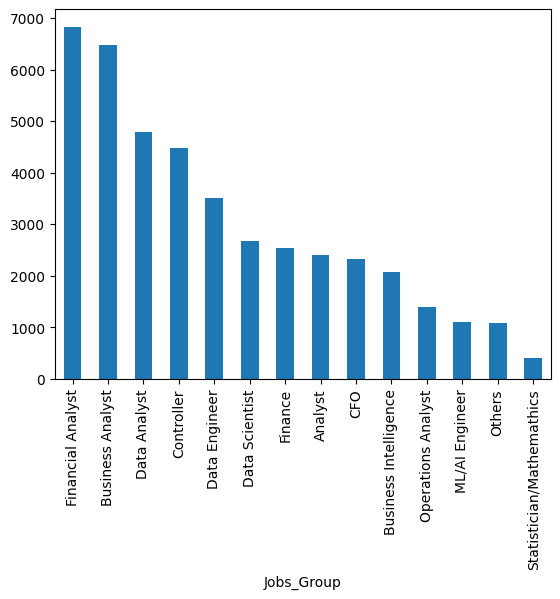

In [17]:
df['Jobs_Group'].value_counts().head(25).plot.bar()

In [18]:
color_list=  ['DarkBlue','Teal','LightBlue','MediumAquamarine','Plum','OrangeRed','DarkRed','Pink','LightGoldenrodYellow']

colormap = colors.ListedColormap(color_list)

plt.rcParams['figure.figsize'] = (10,10)

wordcloud =  WordCloud(background_color= 'white',
                       width = 1200,height = 800 ,
                       max_words = 120,colormap = colormap ).generate(" ".join(words))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined

In [19]:
np.max(df['Mean_Salary']*1000)

600000.0

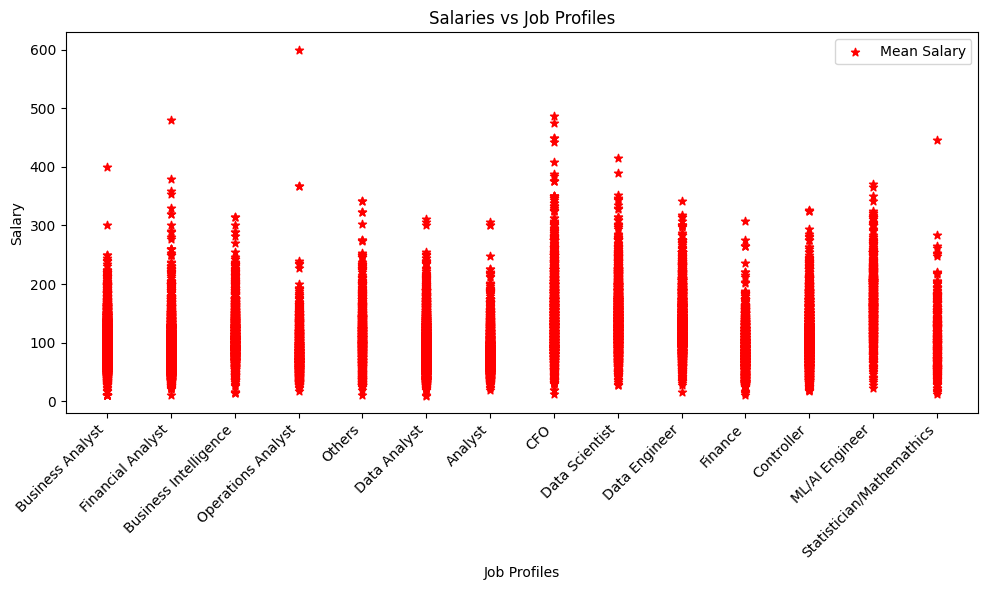

In [70]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Jobs_Group'], df['Mean_Salary'],label='Mean Salary',color = 'red',marker = '*')
#plt.scatter(df['Jobs_Group'], df['Low_Salary'], label='Min Salary', color='green')
#plt.scatter(df['Jobs_Group'], df['High_Salary'], label='Max Salary', color='red')
#plt.axes().set_facecolor('black')
# Adding labels and title
plt.xlabel('Job Profiles')
plt.ylabel('Salary')
plt.title('Salaries vs Job Profiles')
plt.legend()  # Show legend

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig=make_subplots(rows=3,cols=1,subplot_titles=('<i>Minimum Salaries', '<i>Mean Salaries', '<i>Maximum Salaries'))
fig.add_trace(go.Scatter(x=df['Jobs_Group'],y=df['Low_Salary'],name='Minimum',mode='markers'),row=1,col=1)
fig.add_trace(go.Scatter(x=df['Jobs_Group'],y=df['Mean_Salary'],name='Mean',mode='markers'),row=2,col=1)
fig.add_trace(go.Scatter(x=df['Jobs_Group'],y=df['High_Salary'],name='Maximum',mode='markers'),row=3,col=1)

fig.update_layout(height=1000, width=800, title_text='<b>Salary Comparison', font_size=12)
fig.update_layout(template='plotly_dark', title_x=0.5, font_family='Courier New', showlegend=True)

In [22]:
dfc = df['Company'].value_counts().head(20).sort_values(ascending = True).reset_index()


In [ ]:
#import plotly.express as px
fig = px.scatter_3d(df, x='Profile', y='Remote', z='Mean_Salary',
                    color='Mean_Salary')
fig.update_layout(title='<b> 3D Scatter Plot <b>', title_x=0.5,
                  titlefont=dict({'size':28, 'family': 'Courier New', 'color':'white'}),
                  template='plotly_dark',
                  width=900, height=500,
                 )
fig.update_layout(scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="black",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="black"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="black"),
                              ),
                  )
fig.show()

: 

In [ ]:
import plotly.express as px

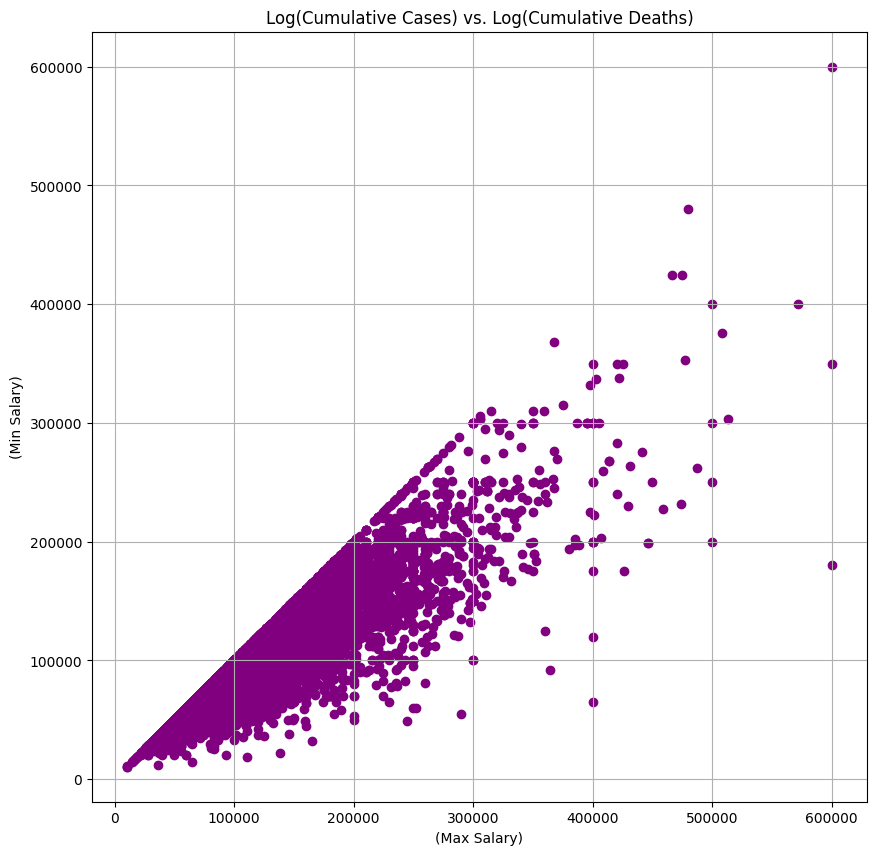

In [33]:
df1 = pd.DataFrame(df,columns=['Company','High_Salary','Low_Salary'])
cd = df1.groupby('Company')[['High_Salary','Low_Salary']].max().reset_index()
fig,ax=plt.subplots()
fig.figsize=(6, 4)
plt.scatter((cd['High_Salary'].clip(lower=1)),(cd['Low_Salary'].clip(lower=1)),c='purple',marker='o')
plt.xlabel('(Max Salary)')
plt.ylabel('(Min Salary)')
plt.title('Log(Cumulative Cases) vs. Log(Cumulative Deaths)')
plt.grid(True)
plt.show()

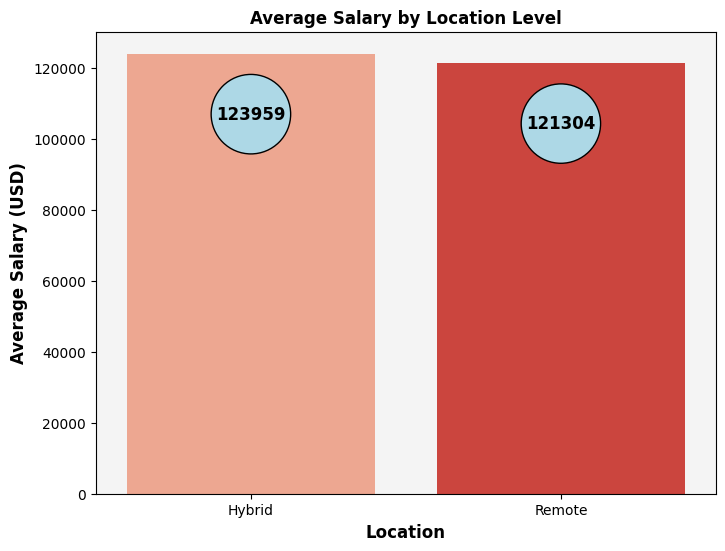

In [35]:
exp_salary = df.groupby('Remote')['High_Salary'].mean()
plt.figure(figsize = (8,6))
ax = sns.barplot(x = exp_salary.index, y = exp_salary.values, palette = 'Reds')
plt.title('Average Salary by Location Level', fontsize=12, fontweight='bold')
plt.xlabel('Location', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container,
                padding = -50,
                fontsize = 12,
                bbox = {'boxstyle': 'circle', 'edgecolor': 'black', 'facecolor': 'lightblue'},
                label_type="edge",
                fontweight = 'bold'


                )

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x258842ee0c0>],
 'cmeans': <matplotlib.collections.LineCollection at 0x25888f4af30>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x25883ace060>,
 'cmins': <matplotlib.collections.LineCollection at 0x25888fab650>,
 'cbars': <matplotlib.collections.LineCollection at 0x258842ef710>,
 'cmedians': <matplotlib.collections.LineCollection at 0x25888b0b500>}

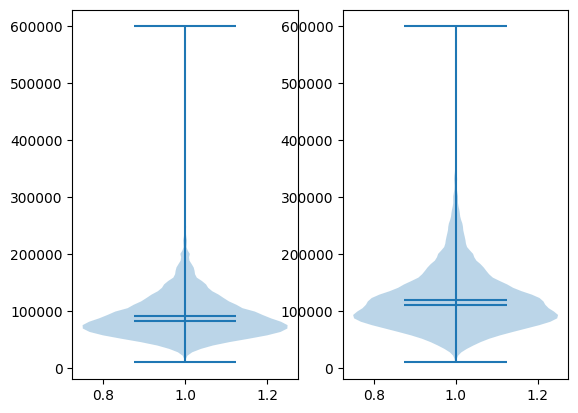

In [9]:

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
ax1.violinplot(df['Low_Salary'],showmedians=True,showmeans=True,vert=True)
ax2.violinplot(df['High_Salary'],showmedians=True,showmeans=True,vert=True)



In [28]:
import plotly.express as px
fig=px.pie(df, values=df['Remote'].value_counts().values,
           names=df['Remote'].value_counts().index, title='Percentage of remote ratio')
fig.show()

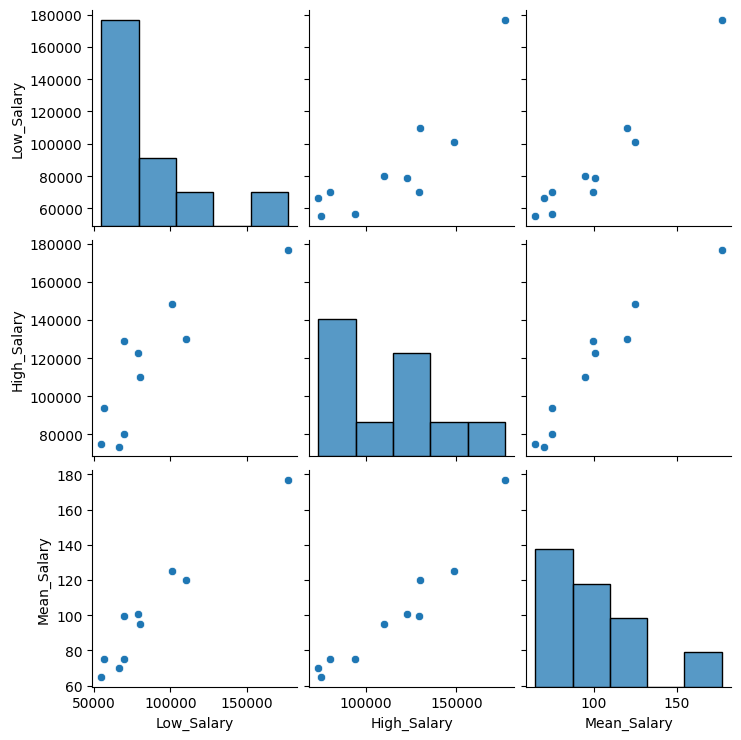

In [50]:
import seaborn as sns
sns.pairplot(df.head(10))

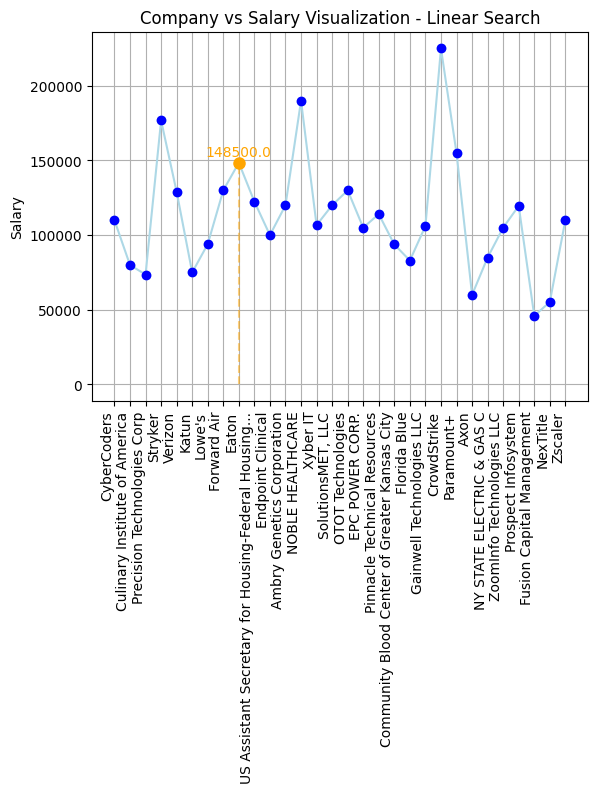

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a sample DataFrame with companies and salaries
#data = {'Company': ['Amazon', 'Apple', 'Facebook', 'Google', 'Microsoft', 'Tesla'],
#        'Salary': [120000, 130000, 150000, 125000, 140000, 110000]}
#df = pd.DataFrame(data)
df = df.head(30)
lc = list(df['Company'])
ls = list(df['High_Salary'])
# Function to perform linear search and visualize the relationship between companies and salaries using a line graph
def linear_search_and_visualize_line_chart(company_name):
    fig, ax = plt.subplots()

    ax.plot(lc, ls, marker='o', linestyle='-', color='lightblue')
    ax.set_xticks(lc)
    ax.set_xticklabels(lc, rotation=90, ha='right')
    ax.set_ylabel('Salary')
    ax.set_title('Company vs Salary Visualization - Linear Search')
    ax.grid(True)
    found = False

    for i, name in enumerate(lc):
        if name == company_name:
            ax.plot(name, ls[i], marker='o', markersize=8, color='orange', label='Found')
            ax.text(name, ls[i] + 2000, f'{ls[i]}', ha='center', va='bottom', color='orange')
            ax.vlines(name, 0, ls[i], linestyles='dashed', color='orange', alpha=0.5)
            found = True
        else:
            ax.plot(name, ls[i], marker='o', linestyle='', color='blue')
        display.display(fig)
        display.clear_output(wait=True)

    if not found:
        print(f"{company_name} not found in the DataFrame.")

    plt.show()

# Example: Perform linear search for 'Microsoft' and visualize the relationship between companies and salaries using a line graph
linear_search_and_visualize_line_chart('Eaton')


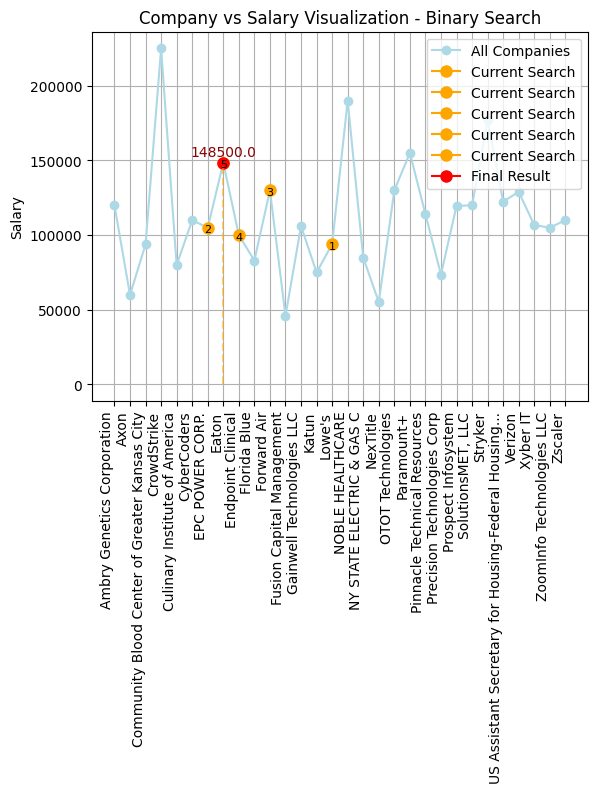

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display


lc = list(df['Company'])
ls = list(df['High_Salary'])

# Sort both lists based on the 'Company'
sorted_data = sorted(zip(lc, ls), key=lambda x: x[0])
lc, ls = zip(*sorted_data)

# Function to perform binary search and visualize the relationship between companies and salaries using a line graph
def binary_search_and_visualize_line_chart(company_name):
    fig, ax = plt.subplots()

    ax.plot(lc, ls, marker='o', linestyle='-', color='lightblue', label='All Companies')
    ax.set_xticks(lc)
    ax.set_xticklabels(lc, rotation=90, ha='right')
    ax.set_ylabel('Salary')
    ax.set_title('Company vs Salary Visualization - Binary Search')
    ax.grid(True)

    found = False

    # Perform binary search on the sorted data
    left, right = 0, len(lc) - 1
    sequence_number = 1  # Initialize sequence number

    while left <= right:
        mid = (left + right) // 2

        # Highlight the current dot
        ax.plot(lc[mid], ls[mid], marker='o', markersize=8, color='orange', label='Current Search')

        # Print the sequence number on top of the highlighted dot
        ax.text(lc[mid], ls[mid] + 2000, str(sequence_number), ha='center', va='top', color='black', fontsize=8)

        if lc[mid] == company_name:
            # Highlight the final result with a different color
            ax.plot(lc[mid], ls[mid], marker='o', markersize=8, color='red', label='Final Result')
            ax.text(lc[mid], ls[mid] + 2000, f'{ls[mid]}', ha='center', va='bottom', color='darkred')
            ax.vlines(lc[mid], 0, ls[mid], linestyles='dashed', color='orange', alpha=0.5)
            found = True
            break
        elif lc[mid] < company_name:
            left = mid + 1
        else:
            right = mid - 1

        # Increment the sequence number for the next iteration
        sequence_number += 1

        # Update the plot
        display.display(fig)
        display.clear_output(wait=True)

    if not found:
        print(f"{company_name} not found in the DataFrame.")

    plt.legend()
    plt.show()

# Example: Perform binary search for 'Microsoft' and visualize the relationship between companies and salaries using a line graph
binary_search_and_visualize_line_chart('Eaton')
